<h3>Importing the Libraries</h3>

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split

In [2]:
#Reading the data set
data=pd.read_csv('Dataset/Bengaluru_House.csv')
data.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
4506,Super built-up Area,Ready To Move,Banashankari Stage III,3 BHK,Pridsi,1305,2.0,1.0,60.00
1620,Plot Area,18-May,Marsur,3 Bedroom,MGave E,1000,4.0,3.0,66.00
9889,Plot Area,Ready To Move,Begur Road,5 Bedroom,NaN,1100,5.0,1.0,165.00
11376,Built-up Area,18-Dec,Electronic City,2 BHK,NaN,1140,2.0,1.0,32.92
584,Super built-up Area,Ready To Move,Dooravani Nagar,3 BHK,Puceswn,1578,3.0,1.0,180.00


In [3]:
#Checking the data types of each columns
data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
#checking the null values in the data set
data.isnull().sum().sum()

6201

In [6]:
#null values in each column
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
#droping the row that has a null value 
data.dropna(subset=['location'],inplace=True)

In [8]:
data.duplicated().sum()

529

<h4>Size</h4>

In [9]:
##preprocessing column size 
data['BHK']=data['size'].str.extract('(\d+)')

In [10]:
data['BHK']=pd.to_numeric(data['BHK'],errors='coerce')

In [11]:
#checkimg the null values in the column BHK
data['BHK'].isnull().sum().sum()

16

In [12]:
data['BHK'].fillna(data['BHK'].median(),inplace=True) #filling the missing values with median value

<h4>balcony</h4>

In [13]:
#checking the null values in column balcony
data['balcony'].isnull().sum()

609

around 5 % of the data is missing in the column balcony

In [14]:
data.dropna(subset=['balcony'],inplace=True)

In [15]:
data['balcony'].isnull().sum()

0

<h4>bath</h4>

In [16]:
data['bath'].isnull().sum()

0

<h4>total_sqft</h4>

In [17]:
def to_sqft(x):
    # Handle ranges (e.g., "4000 - 5249")
    if '-' in x:
        token = x.split('-')
        if len(token) == 2:
            return (float(token[0].strip()) + float(token[1].strip())) / 2

    # Handle Sq. Yards to Sq. Feet
    if "Sq. Yards" in x:
        return float(x.split("Sq. Yards")[0].strip()) * 9

    # Handle Sq. Meter to Sq. Feet
    if "Sq. Meter" in x:
        return float(x.split("Sq. Meter")[0].strip()) * 10.7639

    # Handle Perch to Sq. Feet
    if "Perch" in x:
        return float(x.split("Perch")[0].strip()) * 272.25

    # Handle Grounds to Sq. Feet
    if "Grounds" in x:
        return float(x.split("Grounds")[0].strip()) * 2400

    # Handle Acres to Sq. Feet
    if "Acres" in x:
        return float(x.split("Acres")[0].strip()) * 43560

    # Handle Cents to Sq. Feet
    if "Cents" in x:
        return float(x.split("Cents")[0].strip()) * 435.6

    # Handle Guntha to Sq. Feet
    if "Guntha" in x:
        return float(x.split("Guntha")[0].strip()) * 1089

    # Handle standalone numeric values
    try:
        return float(x)
    except ValueError:
        return None  # For invalid or unknown formats

In [18]:
data['total_sqft']=data['total_sqft'].apply(to_sqft)

<h4>location</h4>

In [19]:
unique_loc=data['location'].unique()#checkking the unique values of colum location 
len(unique_loc)

1265

In [20]:
data['location']=data['location'].str.lower()#converting all the values of column location to lowercase 

In [21]:
data.sample()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK
4219,Super built-up Area,18-Jan,8th phase jp nagar,2 BHK,NaN,1059.0,2.0,2.0,34.5,2.0


In [22]:
len(data['location'].unique()) #the difference before converting to lower case and after converting 1304-1294

1256

In [23]:
#removing the white spaces between the words in a value
data['location']=data['location'].apply(lambda x:x.strip())

<h4>new column price_per_sqft'</h4>

In [24]:
#The price is in terms of lakhs to caluclate the amount per sqr feet 
data['price_per_sqft']=((data['price']*100000)/(data['total_sqft']))
data['price_per_sqft']=pd.to_numeric(data['price_per_sqft'],errors='coerce')
data.head(2)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,19-Dec,electronic city phase ii,2 BHK,Coomee,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Plot Area,Ready To Move,chikka tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,4.0,4615.384615


In [25]:
#Removing outliers
def Outlier_price(data,column):
    sorted_data=data.sort_values(by=column)
    Q1=sorted_data[column].quantile(0.25)
    Q3=sorted_data[column].quantile(0.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    data_no_out=sorted_data[(sorted_data[column]>lower_limit)&(sorted_data[column]<upper_limit)]
    return data_no_out

In [26]:
data1=Outlier_price(data,'price_per_sqft')

In [27]:
data1.shape

(11523, 11)

<h3>Before and after removing the outliers in column price_per_sqft</h3>

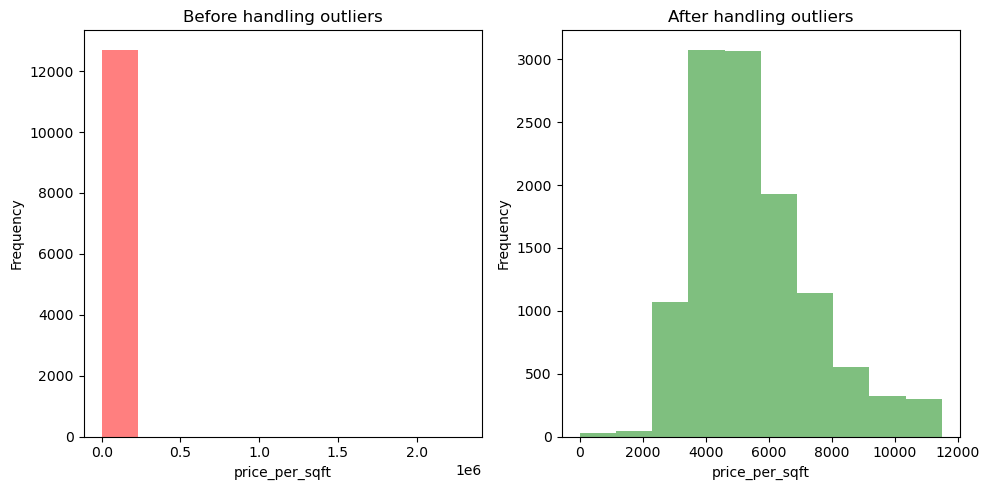

In [28]:
  fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram for 'data'
data['price_per_sqft'].plot.hist(color='r', ax=ax[0], alpha=0.5)
data1['price_per_sqft'].plot.hist(color='g', ax=ax[1], alpha=0.5)

# Setting titles and labels
ax[0].set_title('Before handling outliers')
ax[0].set_xlabel('price_per_sqft')
ax[0].set_ylabel('Frequency')

ax[1].set_title('After handling outliers')
ax[1].set_xlabel('price_per_sqft')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [29]:
data1.shape

(11523, 11)

<Axes: xlabel='BHK', ylabel='price'>

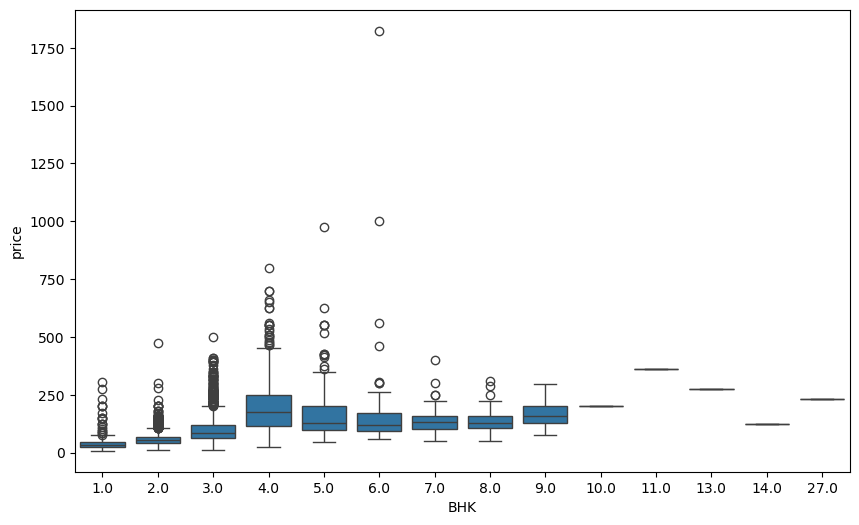

In [30]:
fig=plt.figure(figsize=(10,6))
sns.boxplot(x='BHK',y='price',data=data1)

In [31]:
data1=data1[data1.bath<data1.BHK+3]
data1.shape[0]

11519

In [32]:
data1.isnull().sum()

area_type            0
availability         0
location             0
size                 0
society           4297
total_sqft           0
bath                 0
balcony              0
price                0
BHK                  0
price_per_sqft       0
dtype: int64

In [33]:
data1[(data1['total_sqft']/data1['BHK'])<350]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,BHK,price_per_sqft
8653,Plot Area,Ready To Move,doddaballapur,2 Bedroom,NaN,640.0,1.0,0.0,10.5,2.0,1640.625000
11173,Super built-up Area,Ready To Move,kadabagere,2 BHK,Jahipa,675.0,2.0,2.0,13.5,2.0,2000.000000
2796,Built-up Area,Ready To Move,electronic city,3 BHK,Itelaa,880.0,2.0,1.0,18.0,3.0,2045.454545
7028,Super built-up Area,Ready To Move,kadabagere,2 BHK,Jahipa,675.0,1.0,1.0,15.0,2.0,2222.222222
4786,Super built-up Area,Ready To Move,electronic city,2 BHK,Itelaa,660.0,1.0,1.0,15.0,2.0,2272.727273
...,...,...,...,...,...,...,...,...,...,...,...
3342,Plot Area,Ready To Move,bhuvaneshwari nagar,3 Bedroom,NaN,440.0,3.0,0.0,50.0,3.0,11363.636364
8146,Plot Area,Ready To Move,sarjapur road,5 Bedroom,Owlotou,1480.0,4.0,1.0,169.0,5.0,11418.918919
8966,Plot Area,Ready To Move,vishveshwarya layout,6 Bedroom,NaN,1400.0,6.0,3.0,160.0,6.0,11428.571429
7495,Plot Area,Ready To Move,subramanyapura,3 Bedroom,NaN,600.0,3.0,1.0,69.0,3.0,11500.000000


In [34]:
data1=data1[(data1['total_sqft']/data1['BHK'])>=350]

<h2>Handling the outliers in the column BHK</h2>

In [35]:
def Scatter_BHK(df,location):
    df_bhk2=df[(df.location==location)&(df.BHK==2)]
    df_bhk3=df[(df.location==location)&(df.BHK==3)]
    fig=plt.figure(figsize=(8,3))
    plt.scatter(df_bhk2.total_sqft,df_bhk2.price,color='y',s=50,label='2 BHK')
    plt.scatter(df_bhk3.total_sqft,df_bhk3.price,marker='X',color='g',s=50,label='3 BHK')
    plt.xlabel('Total square foot ')
    plt.ylabel('Price(in lakhs(ind rupees))')
    plt.title(location)
    plt.legend()
    plt.show()
    

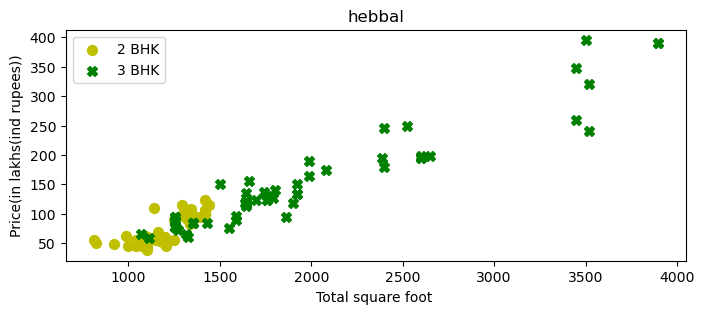

In [36]:
Scatter_BHK(data1,'hebbal')

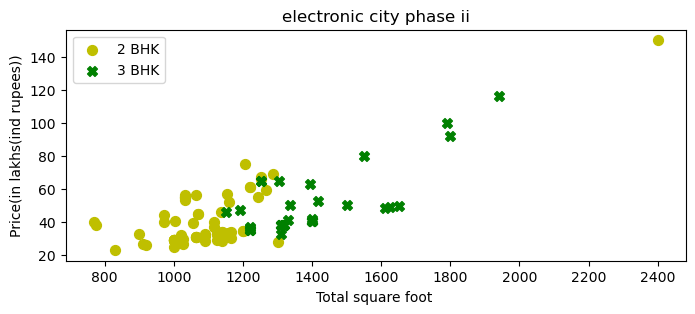

In [37]:
Scatter_BHK(data1,'electronic city phase ii')

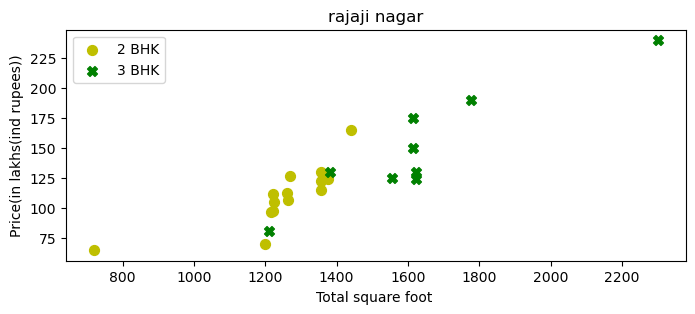

In [38]:
Scatter_BHK(data1,'rajaji nagar')

In [39]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [40]:
data2=remove_bhk_outliers(data1)
print('before:',data1.shape[0])
print('after:',data2.shape[0])

before: 11024
after: 8935


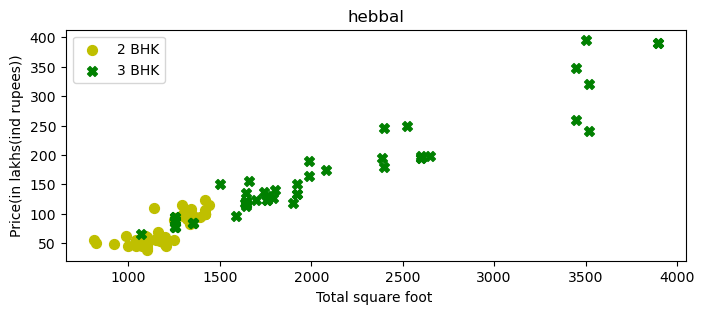

In [41]:
Scatter_BHK(data2,'hebbal')

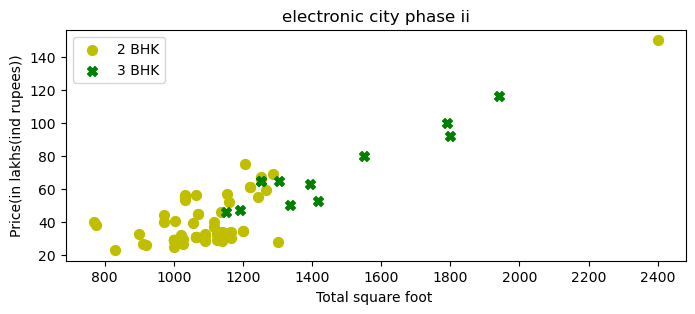

In [42]:
Scatter_BHK(data2,'electronic city phase ii')

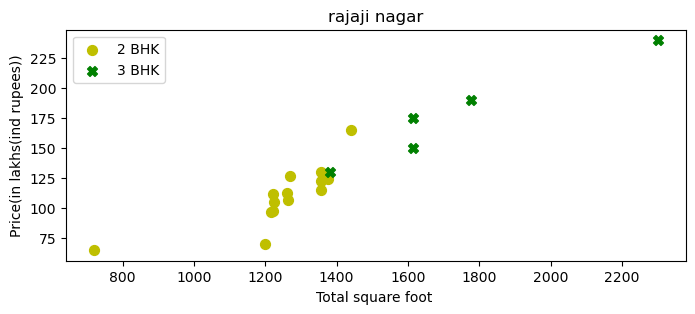

In [43]:
Scatter_BHK(data2,'rajaji nagar')

In [44]:
data2['location'].value_counts()

location
whitefield                 258
sarjapur  road             228
thanisandra                151
hebbal                     146
electronic city            141
                          ... 
narayanappa garden           1
veerannapalya                1
p&t colony                   1
mvj engineering college      1
indira nagar 3rd stage       1
Name: count, Length: 1058, dtype: int64

In [45]:
value_loc=data2['location'].value_counts()
cities_less_10=value_loc[value_loc<=10]
data2['location']=data2['location'].apply(lambda x: 'other' if x in cities_less_10 else x)

In [46]:
data2['location'].value_counts()

location
other                  2418
whitefield              258
sarjapur  road          228
thanisandra             151
hebbal                  146
                       ... 
jalahalli east           11
nri layout               11
pattandur agrahara       11
mallasandra              11
sector 7 hsr layout      11
Name: count, Length: 189, dtype: int64

In [47]:
data2.drop(columns=['area_type','availability','size','society','price_per_sqft'],axis=1,inplace=True)

In [48]:
X=data2.drop(columns=['price'],axis=1)
y=data2['price']

In [49]:
X.head(3)

,location,total_sqft,bath,balcony,BHK
1086,other,1306800.0,2.0,2.0,2.0
11615,other,261360.0,2.0,0.0,3.0
7607,other,653400.0,3.0,1.0,3.0


In [50]:
y.head(3)

1086      29.5
11615     80.0
7607     217.0
Name: price, dtype: float64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [52]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

In [55]:
train_data.shape

(6254, 6)

In [57]:
train_data.to_csv('train_data.csv', index=False)

In [56]:
test_data.shape

(2681, 6)

In [58]:
test_data.to_csv('test_data.csv', index=False)